In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Models.Layers import *
from Models.Classifiers.Neural_Net import *
from General_Solver import *

In [82]:
# first step would be to import the dataset
X_full = pd.read_csv('./Datasets/red_wine_dataset.csv')
percentage = 0.8
# X_full.pop('k_value')
# X_full.pop('l_value')
# X_full.pop('m_value')
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [83]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 16)
(320, 16)
float64
(1279,)


(1279, 16)
(1279,)
3.999927832269524e-16
1.0


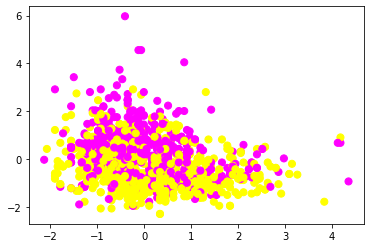

In [84]:
# x_max = np.max(x_train, axis = 0)
# x_min = np.min(x_train, axis = 0)
# x_train = (x_train - x_min) / (x_max - x_min)
mu = x_train.mean(axis = 0)
sigma = x_train.std(axis = 0)
x_train  = (x_train - x_train.mean(axis = 0))/x_train.std(axis = 0)
# mu = x_min
# sigma = (x_max - x_min)
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
print(x_train[:,3].std())
plt.show()


In [85]:
Model = TwoLayerNet(input_dim = x_train.shape[1], hidden_dim = 10, output_dim = 2)

loss, grads = Model.loss(x_train, y_train)

print("loss =", loss)

Model.params['W1'] = Model.params['W1'] - 0.1*grads['W1']
Model.params['b1'] = Model.params['b1'] - 0.1*grads['b1']
Model.params['W2'] = Model.params['W2'] - 0.1*grads['W2']
Model.params['b2'] = Model.params['b2'] - 0.1*grads['b2']

loss, grads = Model.loss(x_train, y_train)
print("shape of W_1 = ",Model.params['W1'].shape)
scores = Model.predict(x_train)



for param,value in Model.params.items():
    print("param = ", param , "Value = ", Model.params[param])

# print((Model.params))


loss = 0.6931477951152623
shape of W_1 =  (16, 10)
(1279, 2)
param =  W1 Value =  [[ 1.77585090e-03  3.96215836e-04  9.89547919e-04  2.23587049e-03
   1.86137824e-03 -9.75899017e-04  9.43756918e-04 -1.42874657e-04
  -1.02791276e-04  4.11701292e-04]
 [ 1.19695508e-04  1.45949456e-03  7.41922006e-04  1.26464086e-04
   4.48947199e-04  3.38177904e-04  1.50498416e-03 -2.14810678e-04
   3.11644894e-04 -8.57328987e-04]
 [-2.53331658e-03  6.49207122e-04  8.76096737e-04 -7.44843849e-04
   2.26379279e-03 -1.45405511e-03  3.78952101e-05 -1.80650295e-04
   1.53189368e-03  1.47071197e-03]
 [ 1.56982639e-04  3.77132833e-04 -8.84691615e-04 -1.97892530e-03
  -3.48262649e-04  1.57164064e-04  1.22865405e-03  1.20084713e-03
  -3.86989798e-04 -3.02120880e-04]
 [-1.05103779e-03 -1.41724366e-03 -1.70556070e-03  1.95054454e-03
  -5.08435470e-04 -4.36000385e-04 -1.24879774e-03  7.71636203e-04
  -1.61267265e-03 -2.13761594e-04]
 [-8.96359074e-04  3.88864304e-04 -5.11599479e-04 -1.17808962e-03
  -2.61976690e-05

In [86]:
#6.5e-4 without mu and ws = 1 hd = 6
x_ts = x_train[40:60]
y_ts = y_train[40:60]
print(y_ts.shape)
NN_small = TwoLayerNet( input_dim = x_ts.shape[1], hidden_dim = 4, output_dim = 2, reg = 0, weight_scale= 1)
sgd_solver = GeneralSolver(NN_small, x_ts, y_ts, lr = 0.355e-4, batch_size = 20, num_epochs = 10000, print_every = 1000, mu = 0.9)
sgd_solver.train('sgd_momentum')


(20,)
fine till here !
Epoch =  0 Batch =  0 Loss =  37.344347580622355
Epoch =  1 Batch =  0 Loss =  37.34187058312909
Epoch =  2 Batch =  0 Loss =  37.337164885790955
Epoch =  3 Batch =  0 Loss =  37.33045445142991
Epoch =  4 Batch =  0 Loss =  37.32194125197024
Epoch =  5 Batch =  0 Loss =  37.31180739536823
Epoch =  6 Batch =  0 Loss =  37.30021705373963
Epoch =  7 Batch =  0 Loss =  37.287318209795146
Epoch =  8 Batch =  0 Loss =  37.273244237556526
Epoch =  9 Batch =  0 Loss =  37.258115332177724
Epoch =  10 Batch =  0 Loss =  37.24203980256723
Epoch =  11 Batch =  0 Loss =  37.22511523941738
Epoch =  12 Batch =  0 Loss =  37.207429570207
Epoch =  13 Batch =  0 Loss =  37.189062011763575
Epoch =  14 Batch =  0 Loss =  37.170083930051604
Epoch =  15 Batch =  0 Loss =  37.15055961599999
Epoch =  16 Batch =  0 Loss =  37.13054698538874
Epoch =  17 Batch =  0 Loss =  37.11009821008539
Epoch =  18 Batch =  0 Loss =  37.089260287250156
Epoch =  19 Batch =  0 Loss =  37.06807555251315
E

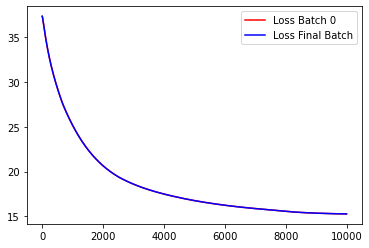

In [87]:
epochs = range(0,sgd_solver.num_epochs)
test_epochs  = range(0,sgd_solver.loss_history.shape[0])
plt.plot(test_epochs, sgd_solver.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(test_epochs, sgd_solver.loss_final_history, label = 'Loss Final Batch', color = 'blue')
plt.legend()
plt.show()

In [88]:
#best 1e-6 -> 20 for now
NN = TwoLayerNet(input_dim = x_train.shape[1],hidden_dim= 10 , output_dim=2, reg = 0.0, weight_scale= 1)
sgd_solver = GeneralSolver(NN, x_train, y_train, lr = 1e-6, batch_size = 20 , num_epochs=2000, print_every=1000)
sgd_solver.train('sgd_momentum')

fine till here !
Epoch =  0 Batch =  0 Loss =  101.96207584933897
Epoch =  1 Batch =  0 Loss =  101.68549979842093
Epoch =  2 Batch =  0 Loss =  101.29718595249562
Epoch =  3 Batch =  0 Loss =  100.90567240478474
Epoch =  4 Batch =  0 Loss =  100.51520379385383
Epoch =  5 Batch =  0 Loss =  100.12595458095458
Epoch =  6 Batch =  0 Loss =  99.73791176373363
Epoch =  7 Batch =  0 Loss =  99.35111645876066
Epoch =  8 Batch =  0 Loss =  98.96557642168497
Epoch =  9 Batch =  0 Loss =  98.58129140984225
Epoch =  10 Batch =  0 Loss =  98.19829575019102
Epoch =  11 Batch =  0 Loss =  97.81658309608771
Epoch =  12 Batch =  0 Loss =  97.43615510830087
Epoch =  13 Batch =  0 Loss =  97.05696099133061
Epoch =  14 Batch =  0 Loss =  96.67903287448428
Epoch =  15 Batch =  0 Loss =  96.30241802561287
Epoch =  16 Batch =  0 Loss =  95.92675154913016
Epoch =  17 Batch =  0 Loss =  95.54938001111427
Epoch =  18 Batch =  0 Loss =  95.17334949638165
Epoch =  19 Batch =  0 Loss =  94.79867955509572
Epoch =

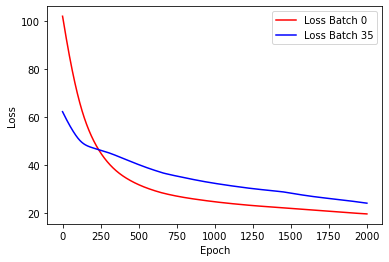

In [89]:
test_epochs  = range(0,sgd_solver.loss_history.shape[0])
plt.plot(test_epochs, sgd_solver.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(test_epochs, sgd_solver.loss_final_history, label = 'Loss Batch 35', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

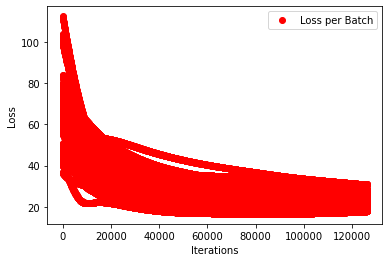

In [90]:
iterations = range(0,sgd_solver.loss_full_history.shape[0])
plt.plot(iterations, sgd_solver.loss_full_history, 'o',color = 'red', label = 'Loss per Batch')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

# print(np.sum(Model.predict(x_train)))
# training_accuracy(Model, x_train, y_train)



In [92]:
def test_accuracy(model, x_test, y_test, mu, sigma):
    y_pred = model.predict((x_test - mu) / sigma)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

x_test_new = x_test
x_test_new = x_test_new 
test_accuracy(Model, x_test_new, y_test, mu, sigma)

(320, 2)


0.546875

In [93]:
print("training accuracy on tiny batch  = ", training_accuracy(NN, x_ts, y_ts)* 100 ,'%')

(20, 2)
training accuracy on tiny batch  =  60.0 %


In [94]:
print("training accuracy = ", training_accuracy(NN, x_train, y_train)* 100 ,'%')

(1279, 2)
training accuracy =  51.83737294761532 %


In [95]:
print("test accuracy = ", test_accuracy(NN, x_test, y_test, mu, sigma)*100,'%')

(320, 2)
test accuracy =  49.375 %
